------------------------------------------
# Decision Tree

### Graphviz
    - http://www.graphviz.org
    - pip install graphviz
------------------------------------------

In [1]:
!pip install graphviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
# 음수기호 표시 안되는거 해결
rcParams["axes.unicode_minus"] = False
import scipy
from sklearn import datasets
from sklearn.model_selection import train_test_split

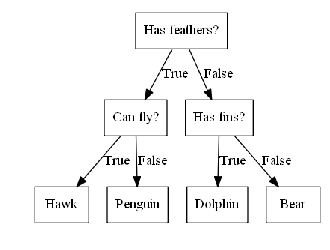

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
mglearn.plots.plot_animal_tree()

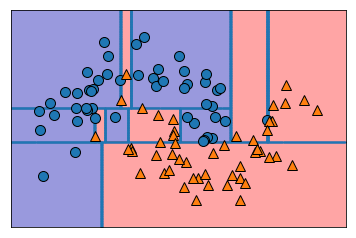

In [10]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
tree = DecisionTreeClassifier(max_depth=9).fit(X, y)  # max_depth : 깊이가 깊어질 수록 학습효과가 높다.
mglearn.plots.plot_tree_partition(X, y, tree)

# 결정 트리 단접 : 과적합 -> 가지치기 : 사전가지치기 / 사후가지치기 , scikit에선 사전 가지 치기만 가능

In [18]:
# 가지치기를 이용한 과적합 해소

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))  # 1.0
print("훈련 테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))  # 0.93

훈련 세트 정확도 : 1.000
훈련 테스트 정확도 : 0.930


In [22]:
# 모델의 복잡도를 올려서 정확도를 높이는 과정 (max_depth이용, 적정한 가지수 찾기)
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))  # 0.995
print("훈련 테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))  # 0.951

훈련 세트 정확도 : 0.995
훈련 테스트 정확도 : 0.951


In [26]:
# 그려보기
# 옵션준비 (그래프 그리는 파일 준비하기)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="data/tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, filled=True)
# tree.dot : 그래프를 그릴 수 있는 정보를 담고 있는 파일이 생성됨

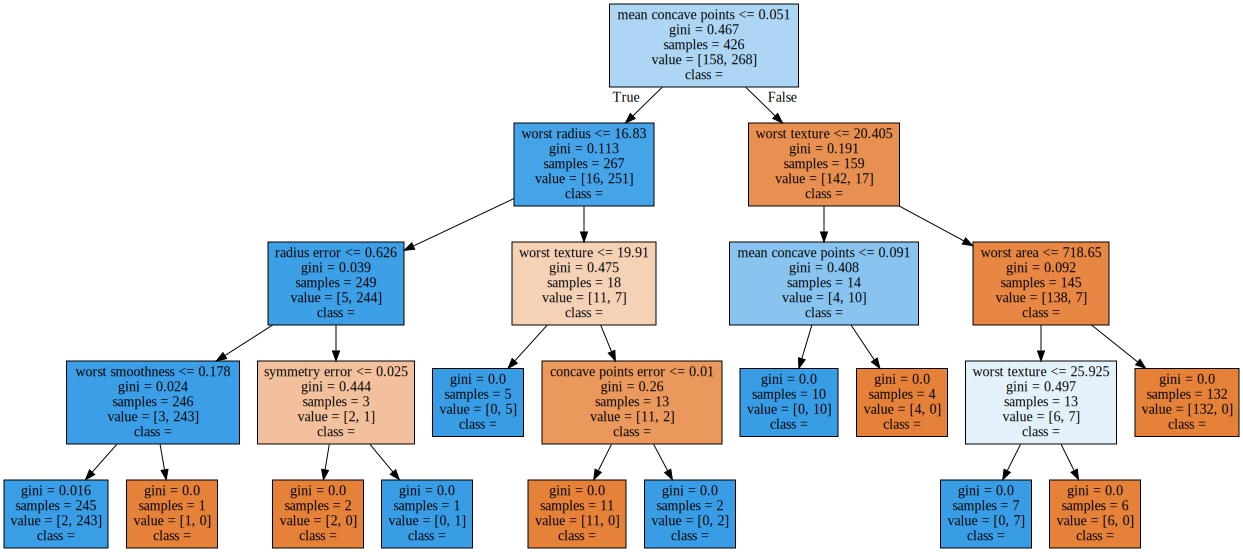

In [28]:
import graphviz

with open("data/tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [29]:
# 트리의 특성 중요도
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


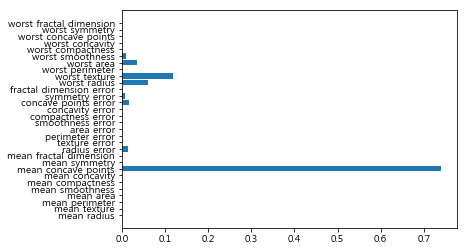

In [42]:
# 특성 중요도 한눈에 보기
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    # 수평 막대그래프
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)  # y눈금

plot_feature_importances_cancer(tree)

# 무조건 mean concave points가 가장 중요성이 높다고 확정지을 수는 없음. 이 모델 자체가 최선이라고 아직 이야기할 수 없기 때문

Feature importances: [0. 1.]


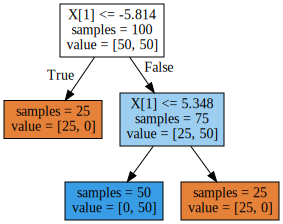

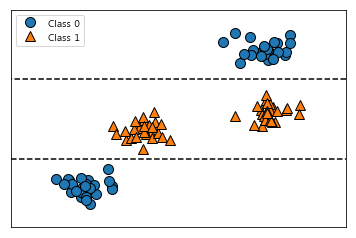

In [43]:
mglearn.plots.plot_tree_not_monotone()  # 2번째 데이터인 1에 대해서만 트리를 생성하고 있음

Text(0, 0.5, '가격($/Mbyte)')

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


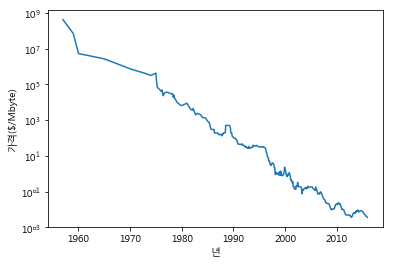

In [45]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
ram_prices.head()
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")

In [46]:
# 2000년 전까지의 데이터를 훈련하여서 2000년 이후의 데이터 예측하기
# 선형모델 / 결정트리

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [50]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
X_train
y_train = np.log(data_train.price)
y_train

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
5      12.897619
6      12.658971
7      12.952495
8      12.101956
9      11.121127
10     10.818177
11     10.614082
12     10.798759
13     10.044987
14     10.373491
15     10.513253
16     10.239960
17     10.290110
18      9.862666
19     10.085809
20      9.680344
21      9.629051
22      9.261794
23      8.810460
24      8.776476
25      9.082507
26      8.407155
27      8.166216
28      8.403801
29      7.590852
         ...    
172     1.098612
173     1.098612
174     1.305626
175     1.386294
176     1.418277
177     1.289233
178     1.226712
179     1.178655
180     0.770108
181     0.770108
182    -0.094311
183    -0.030459
184     0.198851
185     0.173953
186    -0.030459
187     0.029559
188    -0.030459
189     0.148420
190    -0.174353
191    -0.174353
192     0.364643
193    -0.174353
194     0.223144
195     0.223144
196    -0.150823
197    -0.248461
198    -0.139262
199     0.0392

In [51]:
# 훈련
tree = DecisionTreeRegressor().fit(X_train, y_train)
# 선형모델
linear_reg = LinearRegression().fit(X_train, y_train)

In [62]:
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [59]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


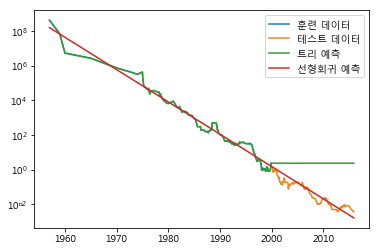

In [63]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
# 트리
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")  # 새로운 데이터에 대한 예측능력이 없음.. (결정 트리 회귀 모델의 단점), but 시계열일 경우에만 그런 것임.
# 선형
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

-------------------------------------
## iris 데이터를 이용한 이진 분류(Decision Tree)
-------------------------------------

In [6]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target
df.head()
# y = result, x = petal length & petal width

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# 독립변수, 종속변수, trainset, testset 준비
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# scale 조정, 표준화 작업
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
# 훈련 시키기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3).fit(X_train_std, y_train)  # criterion= : 알고리즘 선택, entropy: 엔트로피 불순도(분자의 무질서함을 측정)
# 훈련 vs 테스트
# 훈련 시에 max_depth으로 조정
print("학습용 데이터셋 정확도 : {:.3f}".format(model.score(X_train_std, y_train)))  # 0.981
print("테스트용 데이터셋 정확도 : {:.3f}".format(model.score(X_test_std, y_test)))  # 0.978

#별도의 전처리가 크게 필요하지 x

학습용 데이터셋 정확도 : 0.981
테스트용 데이터셋 정확도 : 0.978


In [15]:
#!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\acorn\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


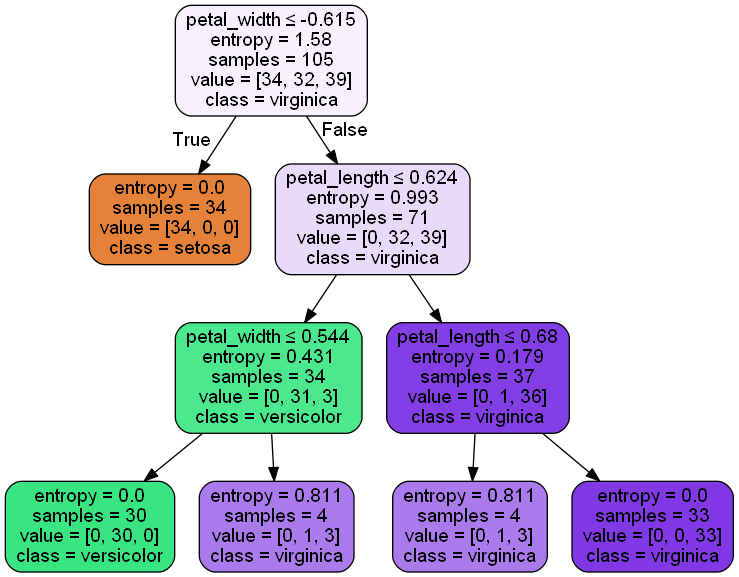

In [19]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

# 임시 path
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
dot_data = export_graphviz(model, out_file=None, feature_names=["petal_length", "petal_width"], \
                        class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# 메모리에 있는 이미지 불러오기
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

--------------------------------------------------
## 서울 지역을 동별로 분류하기 위한 Decision Tree
--------------------------------------------------

In [21]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]
# label : 한강을 기준으로 동서남북을 나눈 지역명

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[["district", "latitude", "longitude", "label"]]
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [22]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "latitude", "longitude", "label"]]
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


In [25]:
train_df.label.value_counts()
test_df.label.value_counts()
train_df.describe()

,latitude,longitude
count,20.000000,20.000000
mean,37.547909,126.999772
std,0.055086,0.089387
min,37.451900,126.849500
25%,37.510177,126.913481
50%,37.552597,127.028844
75%,37.573690,127.056458
max,37.668800,127.151405


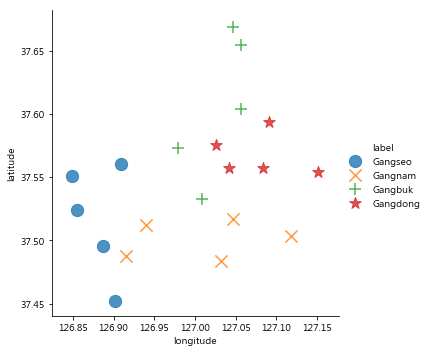

In [31]:
# seaborn으로 label 시각화
sns.lmplot("longitude", "latitude", data=train_df, markers=["o", "x", "+", "*"], hue="label", fit_reg = False, \
          scatter_kws={"s":150})

In [33]:
# 구 이름과 동 이름 삭제하기
train_df.drop(["district"], axis=1, inplace=True)  # 완전히 삭제된 것은 아님

In [36]:
test_df.drop(["dong"], axis=1, inplace=True)

In [43]:
X_train = train_df[["longitude", "latitude"]]
y_train = train_df[["label"]]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [53]:
# 그래프 만드는 함수를 모듈로 만들기
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a decision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


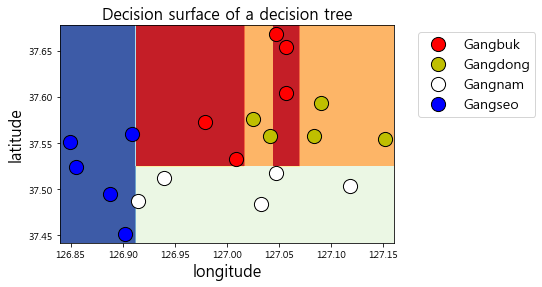

In [54]:
from sklearn import preprocessing

# 문자를 숫자로(labelencoder)
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

# 결과 과적합 

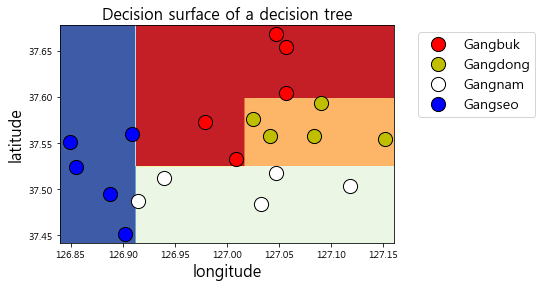

In [55]:
# 이번엔 max_depth이용하지 않고 새로운 하이퍼 파라미터 사용 (규제)
# min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수
# min_samples_Leaf : 맨 마지막 끝 노드의 최소 데이터 갯수
# random_state

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=70).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

# 과적합에서 좀 벗어났음

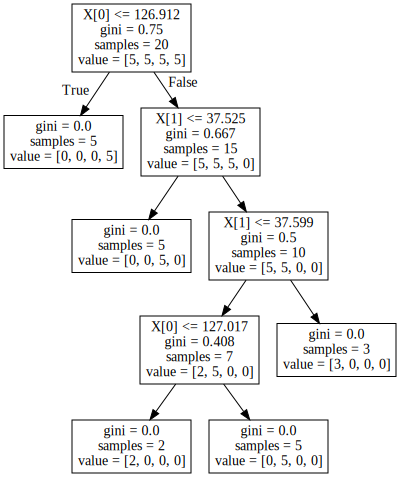

In [57]:
dot_data = export_graphviz(clf, out_file=None, feature_names=["longitude", "latitude"], class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"])
graph = graphviz.Source(dot_data)
graph.render("seoul")
graph

In [58]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


In [61]:
compare = pd.DataFrame({"prediction":le.classes_[pred], "ground_truth":y_test.values.ravel()})
compare

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


----------------------------------------
# Random Forest
----------------------------------------

In [63]:
from sklearn.ensemble import RandomForestClassifier

X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)  # stratify : 층화계층? 중복해서 뽑을 수 있는 것

In [65]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

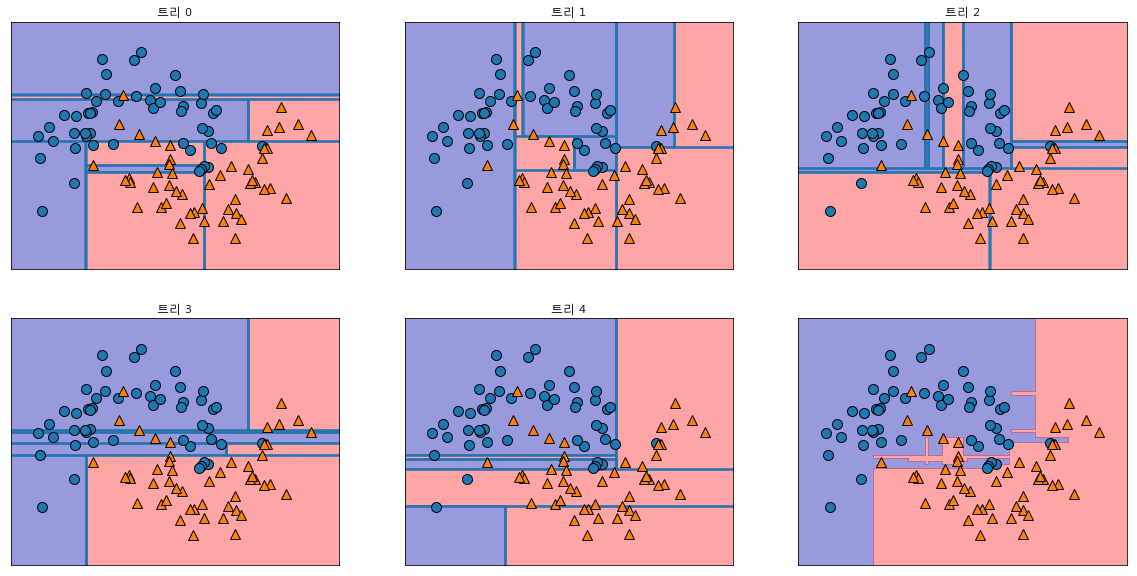

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
# 마지막 빈 그래프 채워주기
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [74]:
# 유방암데이터로 랜덤포레스트 연습
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 42)
tree = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("훈련 테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

# Decision Tree보다 성능이 좋음. (n_estimators : 트리갯수)

훈련 세트 정확도 : 1.000
훈련 테스트 정확도 : 0.972


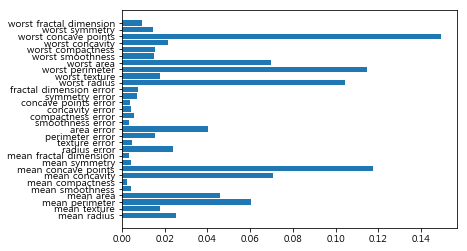

In [75]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    # 수평 막대그래프
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)  # y눈금

plot_feature_importances_cancer(tree)

In [77]:
# 독버섯 예제
# 자료 다운받기
import urllib.request as req

local = "C:/chung/pythonwork/scikit_learn/data/mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("다운로드 완료")

다운로드 완료


In [81]:
mr = pd.read_csv('data/mushroom.csv', header=None)
mr.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [83]:
# 0열(label)의 'p' : poison 

# 특성값을 아스키코드(숫자)로 바꾸기
label =[]
data =[]
for row_index, row in mr.iterrows():   # iterrows: enumerate와 동일한 기능
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
        
    data.append(row_data)

In [85]:
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [86]:
clf = RandomForestClassifier().fit(data_train, label_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
pred = clf.predict(data_test)

In [93]:
from sklearn.metrics import accuracy_score, classification_report
print("정답률 : ", accuracy_score(label_test, pred))  # 1.0
print("레포트:\n", classification_report(label_test, pred))  # 정밀도와 재현도도 확인

정답률 :  1.0
레포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1019
           p       1.00      1.00      1.00      1012

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [99]:
# 머쉬룸 데이터는 숫자의 크고 작음에 의미가 없기 때문에 혹시라도 발생될 수 있는 해석오류를 방지하기 위해 특성값의 숫자의 의미를 없앤다.
#mr.info()  # 23 columns

label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():   # iterrows: enumerate와 동일한 기능
    label.append(row.loc[0])
    exdata = []
    for col, v in enumerate(row.loc[1:]):   # data뿐만 아니라 index값도 같이 넘김
        if row_index == 0:
            attr = {"dic":{}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
            
        d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
            
        d[idx] = 1
        exdata += d
        
    data.append(exdata)

In [104]:
data_train, data_test, label_train, label_test = train_test_split(data, label)
clf = RandomForestClassifier().fit(data_train, label_train)
pred = clf.predict(data_test)
print("정답률 : ", accuracy_score(label_test, pred))
print("레포트:\n", classification_report(label_test, pred))

정답률 :  1.0
레포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1062
           p       1.00      1.00      1.00       969

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [113]:
# 손글씨 인식?
mnist = datasets.load_digits()
#mnist.data.shape  # (1797, 64)
#mnist.data[0]
features, labels = mnist.data, mnist.target

In [116]:
from sklearn.model_selection import cross_val_score
def cross_validation(clf, X, y):
    # 10겹, cross validation
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
    
    return cv_scores

In [117]:
# decision tree이용
dt_cv_scores = cross_validation(DecisionTreeClassifier(), features, labels)  # 10번 실행
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)  # 10번 실행

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


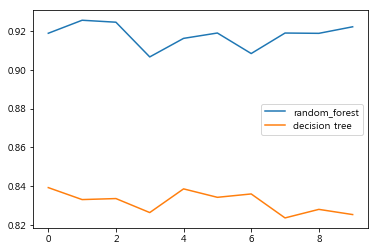

In [120]:
cv_list = [['random_forest', rf_cv_scores], ['decision tree', dt_cv_scores]]
df = pd.DataFrame.from_items(cv_list)
df.plot()

In [121]:
print("결정 트리 정확도 : ", np.mean(dt_cv_scores))  # 0.8318
print("랜덤 포레스트 정확도 : ", np.mean(rf_cv_scores))  # 0.9178
# 결정 트리보다는 랜덤 포레스트가 성능이 좋다.

결정 트리 정확도 :  0.8318425433892915
랜덤 포레스트 정확도 :  0.9178355489875593


----------------------------------------
# Gradient Boosted Regression Tree(GBRT)
    - 회귀와 분류 양쪽에서 사용 가능
    - 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리 생성(경사 하강법)
    - 강력한 가지치기가 사용된다. (보통 최대 5개의 깊이로 생성)
    - 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공
    - Learning rate를 사용하여 오차 보정
    
    - * 부스팅 : 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
----------------------------------------

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 42)
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))  # 1.0
print("테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))  # 0.958

훈련 세트 정확도 : 1.000
테스트 정확도 : 0.958


In [6]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))  # 0.991
print("테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))  # 0.965

훈련 세트 정확도 : 0.991
테스트 정확도 : 0.965


In [7]:
# learning rate 적용하기
tree = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))  # 0.944
print("테스트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))  # 0.951

# max_depth로 이미 최적의 모델을 찾았기 때문에 learning rate의 영향은 초라해짐...


훈련 세트 정확도 : 0.944
테스트 정확도 : 0.951


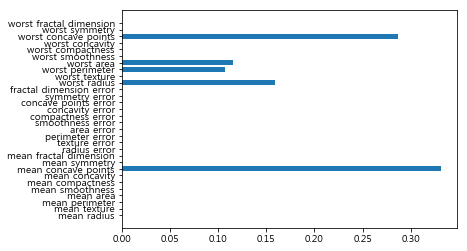

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    # 수평 막대그래프
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)  # y눈금

plot_feature_importances_cancer(tree)
